In [1]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))


Bad key text.latex.unicode in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/harshithakonduru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to 

In [2]:
from collections import Counter
from string import punctuation

In [243]:
import spacy

In [244]:
nlp = spacy.load("en_core_web_sm")

In [4]:
nlp

In [5]:
with open('/Users/harshithakonduru/Downloads/garzoni2020.txt') as f:
    contents = f.read()
    print(contents)

Fostering digital transformation of
SMEs: a four levels approach
Antonello Garzoni and Ivano De Turi
Department of Economics and Management, Universita LUM Jean Monnet,
Casamassima, Italy, and
Giustina Secundo and Pasquale Del Vecchio
Department of Innovation Engineering, University of Salento, Lecce, Italy
Abstract
Purpose – The purpose of this paper is to analyse how digital technologies trigger changes in the business
process of manufacturing small and medium-sized enterprises (SMEs) in the Apulia Region (South Italy). As
SMEs play an essential role in the process value creation of industries and countries, the article examines the
enablers of Industry 4.0 in a regional contexts characterized by delay in research and development and
innovation performances where the companies’ competitiveness is based on limited knowledge and
technological assets.
Design/methodology/approach – The case study of Smart District 4.0, an ongoing project aimed to
promote the digitalization of SMEs operat

In [6]:
my_doc = nlp(contents)
type(my_doc)

spacy.tokens.doc.Doc

In [22]:
ls=contents.split(' ')
ls2 = []
for i in ls:
    if not len(i)<=4:
        ls2.append(i)
print(ls2)

['Fostering', 'digital', 'transformation', 'of\nSMEs:', 'levels', 'approach\nAntonello', 'Garzoni', 'Ivano', 'Turi\nDepartment', 'Economics', 'Management,', 'Universita', 'Monnet,\nCasamassima,', 'Italy,', 'and\nGiustina', 'Secundo', 'Pasquale', 'Vecchio\nDepartment', 'Innovation', 'Engineering,', 'University', 'Salento,', 'Lecce,', 'Italy\nAbstract\nPurpose', 'purpose', 'paper', 'analyse', 'digital', 'technologies', 'trigger', 'changes', 'business\nprocess', 'manufacturing', 'small', 'medium-sized', 'enterprises', '(SMEs)', 'Apulia', 'Region', '(South', 'Italy).', 'As\nSMEs', 'essential', 'process', 'value', 'creation', 'industries', 'countries,', 'article', 'examines', 'the\nenablers', 'Industry', 'regional', 'contexts', 'characterized', 'delay', 'research', 'development', 'and\ninnovation', 'performances', 'where', 'companies’', 'competitiveness', 'based', 'limited', 'knowledge', 'and\ntechnological', 'assets.\nDesign/methodology/approach', 'study', 'Smart', 'District', 'ongoing', '

In [23]:
replaced_text = contents.replace('\n', ' ')
replaced_text

'Fostering digital transformation of SMEs: a four levels approach Antonello Garzoni and Ivano De Turi Department of Economics and Management, Universita LUM Jean Monnet, Casamassima, Italy, and Giustina Secundo and Pasquale Del Vecchio Department of Innovation Engineering, University of Salento, Lecce, Italy Abstract Purpose – The purpose of this paper is to analyse how digital technologies trigger changes in the business process of manufacturing small and medium-sized enterprises (SMEs) in the Apulia Region (South Italy). As SMEs play an essential role in the process value creation of industries and countries, the article examines the enablers of Industry 4.0 in a regional contexts characterized by delay in research and development and innovation performances where the companies’ competitiveness is based on limited knowledge and technological assets. Design/methodology/approach – The case study of Smart District 4.0, an ongoing project aimed to promote the digitalization of SMEs opera

In [86]:
type(ls)

list

In [25]:
ls2 = []
for i in ls:
    if not len(i)<=4 and not len(i) > 10:
        ls2.append(i)
print(ls2)

['Fostering', 'digital', 'of\nSMEs:', 'levels', 'Garzoni', 'Ivano', 'Economics', 'Universita', 'Italy,', 'Secundo', 'Pasquale', 'Innovation', 'University', 'Salento,', 'Lecce,', 'purpose', 'paper', 'analyse', 'digital', 'trigger', 'changes', 'small', '(SMEs)', 'Apulia', 'Region', '(South', 'Italy).', 'As\nSMEs', 'essential', 'process', 'value', 'creation', 'industries', 'countries,', 'article', 'examines', 'Industry', 'regional', 'contexts', 'delay', 'research', 'where', 'companies’', 'based', 'limited', 'knowledge', 'study', 'Smart', 'District', 'ongoing', 'project', 'aimed', 'to\npromote', 'operating', 'Agri–Food,', 'Apulia', 'Region', '(South', 'Italy)', 'analysed.', 'project', 'financed', 'Economic', 'final', 'sustain', 'digital', 'in\nSouth', 'results', 'introduce', 'levels', 'approach', 'engagement', 'adoption', 'namely,', 'digital', 'awareness,', 'digital', 'digital', 'digital', 'level', 'engagement', 'study', 'describes', 'discusses', 'relevant', 'variables', 'that\ncould', 'ma

In [26]:
len(ls2)

2735

In [32]:
type(ls2)

list

In [34]:
def extract_keywords(text, nlp, special_tags: list = None):
    result = []
    pos_tag = ['NOUN'] # 1
    doc = nlp(text.lower()) # 2
        
    if special_tags:
        tags = [tag.lower() for tag in special_tags]
        for token in doc:
            if token.text in tags:
                result.append(token.text)
                
    for chunk in doc.noun_chunks:
        final_chunk = ""
        for token in chunk:
            if (token.pos_ in pos_tag):
                final_chunk =  final_chunk + token.text + " "
        if final_chunk:
            result.append(final_chunk.strip())
            
        for token in doc:
            if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
                continue
            if (token.pos_ in pos_tag):
                result.append(token.text)
        return list(set(result))
                
    #return result # 5

In [35]:
def clean(text):
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [39]:
with open('cleaned.txt', 'w') as f:
    f.write(' '.join(map(str, ls2)))

In [40]:
with open('/Users/harshithakonduru/Downloads/cleaned.txt') as f:
    contents = f.read()
    print(contents)

Fostering digital of
SMEs: levels Garzoni Ivano Economics Universita Italy, Secundo Pasquale Innovation University Salento, Lecce, purpose paper analyse digital trigger changes small (SMEs) Apulia Region (South Italy). As
SMEs essential process value creation industries countries, article examines Industry regional contexts delay research where companies’ based limited knowledge study Smart District ongoing project aimed to
promote operating Agri–Food, Apulia Region (South Italy) analysed. project financed Economic final sustain digital in
South results introduce levels approach engagement adoption namely, digital awareness, digital digital digital level engagement study describes discusses relevant variables that
could managers assess level readiness digitalize Practical regard definition roadmap useful assess and
manage level digital SMEs. study regarding evidences associated Smart District regional context resides definition roadmap digital SMEs
in region where profile companies’ di

In [77]:
doc = nlp(contents)

In [83]:
words = doc.ents
print(words)

(Garzoni Ivano Economics Universita Italy, Secundo Pasquale Innovation University Salento, Lecce, Apulia Region, South Italy, Smart District, Agri–Food, South Italy, South, Smart District, Digital Value, Digital, Digital Industry, 4.0, Paper Research, 1, digital, IoTs, 2017, Nambisan, 2017, 2018, Lombardi, Antonio Bianchin, Nicola Magaletti, andMichele Leone, 4.0, Emerald Insight, October 2019
7, November, December, Emerald Publishing, 2018, 2015, 2018, 2016, Urbinati Defined, 2013, 372, 1994, Chen al., 2015, Lee, 2012, 2015, Mikalef, 2017, DT, Smart District, Apulia Italy, 1989, Smart District, Enterprise Monnet University Bari, Italy, Noovle, 1984, Apulian, Literature Digital Industry, 4.0, 2019, 2019, 2017, 2018, German, Kagermann 2013, 2018, 2018, 2017, Lasi, 2014, 2018, 2017, 2018, Kagermann, three, Digital, Ekbia, 2009, Kallinikos 2013, Nambisan, 2017, Tilson 2010, Digital, Parker 2016, Tiwana, Apple’s Mozilla’s, Tiwana 2010, European Union, European Economy 2015, 2017, 2019, fou

In [95]:
keywds = []
for entity in doc.ents:
    keywds.append(entity.text)
    print(entity.text,'--- ',entity.label_)

Garzoni Ivano Economics Universita Italy ---  ORG
Secundo Pasquale Innovation University Salento ---  ORG
Lecce ---  PERSON
Apulia Region ---  PERSON
South Italy ---  LOC
Smart District ---  PERSON
Agri–Food ---  ORG
South Italy ---  LOC
South ---  LOC
Smart District ---  LOC
Digital Value ---  ORG
Digital ---  ORG
Digital Industry ---  ORG
4.0 ---  CARDINAL
Paper Research ---  ORG
1 ---  CARDINAL
digital ---  ORG
IoTs ---  ORG
2017 ---  DATE
Nambisan ---  GPE
2017 ---  DATE
2018 ---  DATE
Lombardi ---  PERSON
Antonio Bianchin ---  PERSON
Nicola Magaletti ---  ORG
andMichele Leone ---  ORG
4.0 ---  CARDINAL
Emerald Insight ---  ORG
October 2019
7 ---  DATE
November ---  DATE
December ---  DATE
Emerald Publishing ---  ORG
2018 ---  DATE
2015 ---  DATE
2018 ---  DATE
2016 ---  DATE
Urbinati Defined ---  ORG
2013 ---  DATE
372 ---  CARDINAL
1994 ---  DATE
Chen al. ---  PERSON
2015 ---  DATE
Lee ---  PERSON
2012 ---  DATE
2015 ---  DATE
Mikalef ---  PERSON
2017 ---  DATE
DT ---  ORG
Smart 

In [96]:
keywds

['Garzoni Ivano Economics Universita Italy',
 'Secundo Pasquale Innovation University Salento',
 'Lecce',
 'Apulia Region',
 'South Italy',
 'Smart District',
 'Agri–Food',
 'South Italy',
 'South',
 'Smart District',
 'Digital Value',
 'Digital',
 'Digital Industry',
 '4.0',
 'Paper Research',
 '1',
 'digital',
 'IoTs',
 '2017',
 'Nambisan',
 '2017',
 '2018',
 'Lombardi',
 'Antonio Bianchin',
 'Nicola Magaletti',
 'andMichele Leone',
 '4.0',
 'Emerald Insight',
 'October 2019\n7',
 'November',
 'December',
 'Emerald Publishing',
 '2018',
 '2015',
 '2018',
 '2016',
 'Urbinati Defined',
 '2013',
 '372',
 '1994',
 'Chen al.',
 '2015',
 'Lee',
 '2012',
 '2015',
 'Mikalef',
 '2017',
 'DT',
 'Smart District',
 'Apulia Italy',
 '1989',
 'Smart District',
 'Enterprise Monnet University Bari',
 'Italy',
 'Noovle',
 '1984',
 'Apulian',
 'Literature Digital Industry',
 '4.0',
 '2019',
 '2019',
 '2017',
 '2018',
 'German',
 'Kagermann 2013',
 '2018',
 '2018',
 '2017',
 'Lasi',
 '2014',
 '2018',
 

In [97]:
len(keywds)

317

In [98]:
type(keywds)

list

In [102]:
no_integers = [x for x in keywds if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

In [103]:
no_integers

['Garzoni Ivano Economics Universita Italy',
 'Secundo Pasquale Innovation University Salento',
 'Lecce',
 'Apulia Region',
 'South Italy',
 'Smart District',
 'Agri–Food',
 'South Italy',
 'South',
 'Smart District',
 'Digital Value',
 'Digital',
 'Digital Industry',
 '4.0',
 'Paper Research',
 'digital',
 'IoTs',
 'Nambisan',
 'Lombardi',
 'Antonio Bianchin',
 'Nicola Magaletti',
 'andMichele Leone',
 '4.0',
 'Emerald Insight',
 'October 2019\n7',
 'November',
 'December',
 'Emerald Publishing',
 'Urbinati Defined',
 'Chen al.',
 'Lee',
 'Mikalef',
 'DT',
 'Smart District',
 'Apulia Italy',
 'Smart District',
 'Enterprise Monnet University Bari',
 'Italy',
 'Noovle',
 'Apulian',
 'Literature Digital Industry',
 '4.0',
 'German',
 'Kagermann 2013',
 'Lasi',
 'Kagermann',
 'three',
 'Digital',
 'Ekbia',
 'Kallinikos 2013',
 'Nambisan',
 'Tilson 2010',
 'Digital',
 'Parker 2016',
 'Tiwana',
 'Apple’s Mozilla’s',
 'Tiwana 2010',
 'European Union',
 'European Economy 2015',
 'four',
 'sec

In [108]:
list(set(no_integers))

['Smart District Moreover',
 'Frank 2019',
 '50min',
 'Machine Learning',
 'Apulia',
 'Industry Business',
 'three',
 'third',
 'Tilson 2010',
 'ICT',
 'Kagermann 2013',
 'Suite',
 'Suite Suite value Awareness',
 'Lecce',
 'Lombardi',
 'theApulia Region',
 'Digital',
 'Agri–Food',
 'Lee',
 'Noovle',
 'Tiwana 2010',
 'Urbinati Defined',
 'Tiwana',
 'Arnold 2016',
 'Wacker',
 'Seawright Gerring',
 'February 2021',
 'Garzoni Ivano Economics Universita Italy',
 '4.0',
 'Enterprise Monnet University Bari',
 'Mikalef',
 'Secundo Pasquale Innovation University Salento',
 'South',
 'eight',
 '4.2',
 'Pettigrew',
 'February 2018–June 2018',
 'European Economy 2015',
 'Myers Avison',
 'Smart District',
 'Schmidt',
 'Paper Research',
 'EC',
 'about three',
 'Italy',
 'Regional Innovation Scoreboard European Commission',
 'Kane 2019',
 'Smart \nWearable Service',
 'Level',
 'Southern',
 'seven',
 'Apulia Italy',
 'Overall Supply Chain Blockchain',
 'Dashboard DSS',
 'Mouef 2017',
 'European Union'

In [109]:
len(no_integers)

237

In [189]:
df= set(no_integers)
len(df)

138

In [190]:
keyword_df = pd.DataFrame (df, columns = ['keywords'])
print (keyword_df)

                               keywords
0               Smart District Moreover
1                            Frank 2019
2                                 50min
3                      Machine Learning
4                                Apulia
..                                  ...
133  Italian Ministry Economic Research
134                       Digital Value
135                             Italian
136                      Boyce andNeale
137                              German

[138 rows x 1 columns]


In [201]:
df_first = keyword_df.iloc[61:]  
# Printing df_first_3
print(df_first)

                               keywords
61                  European Commission
62                           byNambisan
63                                 four
64                                   I.
65                             Literacy
..                                  ...
133  Italian Ministry Economic Research
134                       Digital Value
135                             Italian
136                      Boyce andNeale
137                              German

[77 rows x 1 columns]


In [164]:
import math
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from owlready2 import *
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshithakonduru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshithakonduru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshithakonduru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [165]:
def read_ontology(path):
    onto = get_ontology(path)
    onto.load()

    # Read classes
    classes = []

    for cl in onto.classes():
        classes.append(cl)

    classes = list(set(classes))

    '''# Read properties
    properties = []

    for prop in onto.properties():
        properties.append(prop)

    properties = list(set(properties))'''

    return classes

def get_mappings(filename):
    mappings = []

    with open(filename) as f:
        soup = BeautifulSoup(f, 'xml')

    cells = soup.find_all('Class')

    for cell in cells:
        entity1 = cell.get_attribute_list

        mappings.append(entity1)

    return mappings


def get_path(cl):
    path = cl.name
    while True:
        try:
            path = path + '/' + cl.is_a[0].name
        except IndexError:
            break
        cl = cl.is_a[0]
        if cl == 'owl.Thing':
          #the very first node
            break

    return '/'.join(path.split('/')[::-1])


def get_classes_df(ont_path):
    data = []

    # Parse ontologies
    classes1 = read_ontology(ont_path)

    # Generate classes
    for class_ in classes1:
        data.append((class_.name.lower(), 
                     get_path(class_).lower(),''.join(class_.label).lower(),''.join(class_.comment).lower()))
    dataset = pd.DataFrame(data, columns=['Name','Path','label','comment'])

    return dataset

In [166]:
get_classes_df('/Users/harshithakonduru/Downloads/I4.0_MM.owl')

,Name,Path,label,comment
0,big_data_and_analytics,thing/technology/advance_it/big_data_and_analy...,,
1,digital_leadership_capability,thing/organization_governance/digital_leadersh...,,
2,advance_it,thing/technology/advance_it,,
3,employee,thing/resources/employee,,
4,data_analytics_in_usage_phase,thing/product/data_analytics_in_usage_phase,,
5,strategy_for_i4.0,thing/organization_governance/strategy_for_i4.0,,
6,cyber_physical_systems,thing/technology/advance_it/cyber_physical_sys...,,
7,simulation_and_modelling,thing/technology/advance_it/simulation_and_mod...,,
8,willingness_to_change,thing/culture/willingness_to_change,,
9,mm_indicator,thing/mm_indicator,,


In [225]:
def iterative_levenshtein(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution

    Taken from python course example at: https://python-course.eu/applications-python/levenshtein-distance.php 
    """

    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution

    #for r in range(rows):
        #print(dist[r])
    
 
    return dist[row][col]


def lexicalSimilarity(e1,e2):

    costs=(1,1,2)
  # Weights for operations on making words similar
  # adding, replacing, deleting 
    
    ci = len(e1)
    cj = len(e2)
    
    ed = iterative_levenshtein(e1,e2,costs=costs)

    comp_ = (min(ci,cj)-ed)/min(ci,cj)

    
    lex_sim = max(0,comp_)
    return(lex_sim)


def struc_similarity_matrix(path1,keyword_df):
    df1_ = get_classes_df(path1)
    df2_ = keyword_df

    costs=(1,1,1)

    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values


    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))

    #Iterate and fill 
    for i in range(entity_list.shape[0]):
        u = entity_list2[i]
        for j in range(entity_list2.shape[0]):
            v = entity_list2[j]
          #similarity -> structural similarity 
            M_sim[i,j] = lexicalSimilarity(u,v)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

def sim_plot(sim_df,threshold):
    plot_df = sim_df
    plot_df[plot_df<threshold]=0.0
    rows = sim_df.shape[0]
    cols = sim_df.shape[1]

    plt.figure(figsize=((1*rows),(0.5*cols)))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    cg = sns.heatmap(sim_df, fmt="g", cmap=cmap,linewidths=0.5, linecolor='black')


In [205]:
sim_df = struc_similarity_matrix('/Users/harshithakonduru/Downloads/I4.0_MM.owl',keyword_df)

In [206]:
sim_df

,Smart District Moreover,Frank 2019,50min,Machine Learning,Apulia,Industry Business,three,third,Tilson 2010,ICT,...,Research,Strauss,second,2018;Wei,Urbinati 2018,Italian Ministry Economic Research,Digital Value,Italian,Boyce andNeale,German
big_data_and_analytics,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
digital_leadership_capability,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
advance_it,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
employee,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
data_analytics_in_usage_phase,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
strategy_for_i4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
cyber_physical_systems,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
simulation_and_modelling,0.0,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
willingness_to_change,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
mm_indicator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


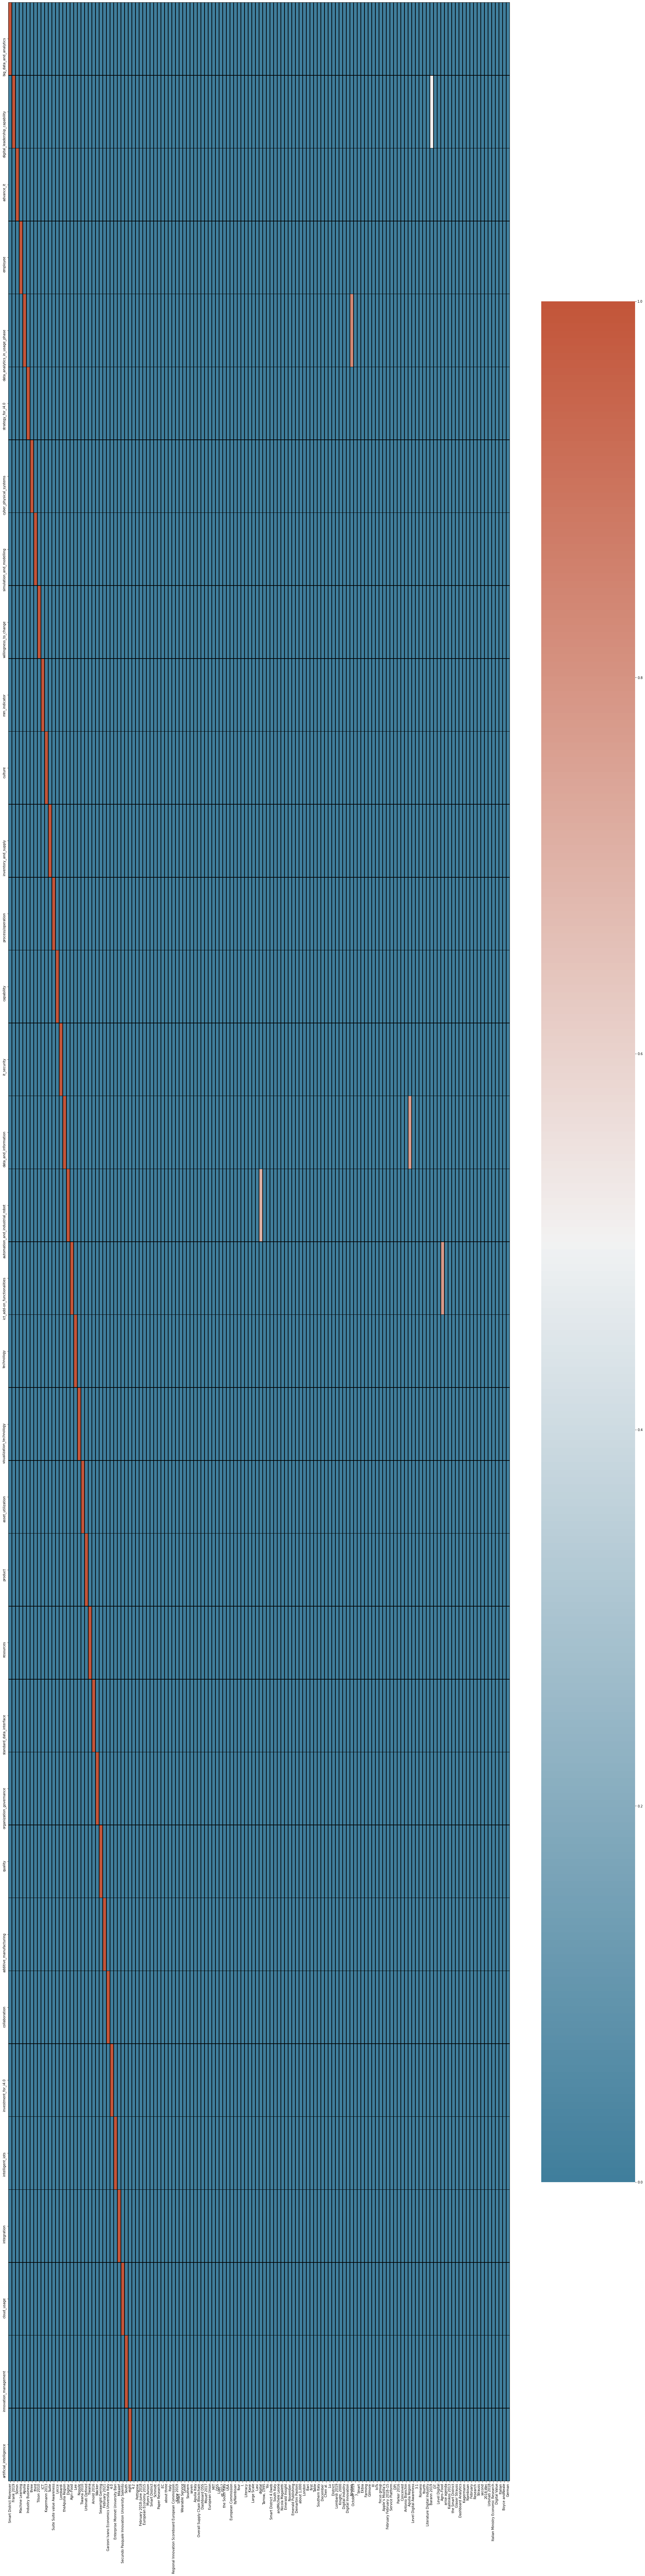

In [226]:
sim_plot(sim_df,0.5)

In [209]:
stacked_df = sim_df.stack().reset_index()
stacked_df

,level_0,level_1,0
0,big_data_and_analytics,Smart District Moreover,1.0
1,big_data_and_analytics,Frank 2019,0.0
2,big_data_and_analytics,50min,0.0
3,big_data_and_analytics,Machine Learning,0.0
4,big_data_and_analytics,Apulia,0.0
...,...,...,...
4687,artificial_intelligence,Italian Ministry Economic Research,0.0
4688,artificial_intelligence,Digital Value,0.0
4689,artificial_intelligence,Italian,0.0
4690,artificial_intelligence,Boyce andNeale,0.0


In [210]:
stacked_df['Entity_Pair_Names'] = stacked_df['level_0'] + ' / ' + stacked_df['level_1']
stacked_df.drop(['level_0','level_1'],axis=1,inplace=True)
stacked_df = stacked_df.rename(columns={0: 'Structural_Similarity'})
stacked_df = stacked_df[['Entity_Pair_Names', 'Structural_Similarity']]

In [211]:
stacked_df

,Entity_Pair_Names,Structural_Similarity
0,big_data_and_analytics / Smart District Moreover,1.0
1,big_data_and_analytics / Frank 2019,0.0
2,big_data_and_analytics / 50min,0.0
3,big_data_and_analytics / Machine Learning,0.0
4,big_data_and_analytics / Apulia,0.0
...,...,...
4687,artificial_intelligence / Italian Ministry Eco...,0.0
4688,artificial_intelligence / Digital Value,0.0
4689,artificial_intelligence / Italian,0.0
4690,artificial_intelligence / Boyce andNeale,0.0


In [212]:
###----Jaccard-----###
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [241]:
def jac_similarity_matrix(path1,keyword_df,param):
    
    df1_ = get_classes_df(path1)
    df2_ = keyword_df
    
    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #label_list  = df1_['label'].values
    #label_list2 = df2_['label'].values


    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values
    #print(l2)



    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))
    #Iterate and fill 
    for i in range(entity_list.shape[0]):
      u = entity_list[i]
      for j in range(entity_list2.shape[0]):
          v = entity_list2[j]
          #similarity -> structural similarity 
          M_sim[i,j] = jaccard_similarity(u,v)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

In [215]:
sim_df_jac = jac_similarity_matrix('/Users/harshithakonduru/Downloads/I4.0_MM.owl',keyword_df,(0.5,0.5))

In [239]:
sim_df_jac

,Smart District Moreover,Frank 2019,50min,Machine Learning,Apulia,Industry Business,three,third,Tilson 2010,ICT,...,Research,Strauss,second,2018;Wei,Urbinati 2018,Italian Ministry Economic Research,Digital Value,Italian,Boyce andNeale,German
big_data_and_analytics,0.238095,0.100000,0.133333,0.277778,0.200000,0.333333,0.066667,0.214286,0.222222,0.0,...,0.187500,0.200000,0.285714,0.052632,0.263158,0.363636,0.294118,0.384615,0.352941,0.125000
digital_leadership_capability,0.318182,0.086957,0.052632,0.368421,0.235294,0.350000,0.266667,0.333333,0.136364,0.0,...,0.375000,0.235294,0.235294,0.095238,0.227273,0.434783,0.315789,0.235294,0.300000,0.166667
advance_it,0.352941,0.117647,0.166667,0.333333,0.153846,0.312500,0.181818,0.272727,0.117647,0.0,...,0.230769,0.153846,0.363636,0.133333,0.235294,0.285714,0.266667,0.363636,0.333333,0.250000
employee,0.176471,0.000000,0.100000,0.062500,0.200000,0.125000,0.111111,0.000000,0.142857,0.0,...,0.083333,0.000000,0.200000,0.076923,0.000000,0.263158,0.142857,0.090909,0.307692,0.200000
data_analytics_in_usage_phase,0.260870,0.086957,0.111111,0.368421,0.312500,0.421053,0.187500,0.250000,0.190476,0.0,...,0.294118,0.235294,0.312500,0.095238,0.173913,0.434783,0.388889,0.312500,0.368421,0.166667
strategy_for_i4.0,0.333333,0.142857,0.117647,0.250000,0.111111,0.300000,0.200000,0.187500,0.200000,0.0,...,0.235294,0.250000,0.176471,0.157895,0.238095,0.333333,0.263158,0.176471,0.190476,0.176471
cyber_physical_systems,0.400000,0.090909,0.117647,0.315789,0.250000,0.300000,0.285714,0.266667,0.142857,0.0,...,0.400000,0.250000,0.176471,0.100000,0.238095,0.523810,0.263158,0.250000,0.250000,0.250000
simulation_and_modelling,0.350000,0.095238,0.200000,0.263158,0.266667,0.388889,0.133333,0.200000,0.277778,0.0,...,0.176471,0.266667,0.357143,0.105263,0.190476,0.409091,0.437500,0.357143,0.333333,0.266667
willingness_to_change,0.350000,0.095238,0.125000,0.411765,0.187500,0.250000,0.214286,0.200000,0.277778,0.0,...,0.333333,0.187500,0.357143,0.105263,0.190476,0.476190,0.352941,0.357143,0.333333,0.187500
mm_indicator,0.411765,0.176471,0.250000,0.312500,0.142857,0.294118,0.166667,0.363636,0.176471,0.0,...,0.214286,0.230769,0.333333,0.058824,0.294118,0.400000,0.176471,0.333333,0.312500,0.333333


In [217]:
stacked_df_jac = sim_df_jac.stack().reset_index()

In [218]:
stacked_df_jac = stacked_df_jac.rename(columns={0: 'Jaccardian_similarity'})
stacked_df['Jaccardian_Similarity'] =  stacked_df_jac['Jaccardian_similarity']
stacked_df

,Entity_Pair_Names,Structural_Similarity,Jaccardian_Similarity
0,big_data_and_analytics / Smart District Moreover,1.0,0.238095
1,big_data_and_analytics / Frank 2019,0.0,0.100000
2,big_data_and_analytics / 50min,0.0,0.133333
3,big_data_and_analytics / Machine Learning,0.0,0.277778
4,big_data_and_analytics / Apulia,0.0,0.200000
...,...,...,...
4687,artificial_intelligence / Italian Ministry Eco...,0.0,0.380952
4688,artificial_intelligence / Digital Value,0.0,0.400000
4689,artificial_intelligence / Italian,0.0,0.416667
4690,artificial_intelligence / Boyce andNeale,0.0,0.294118


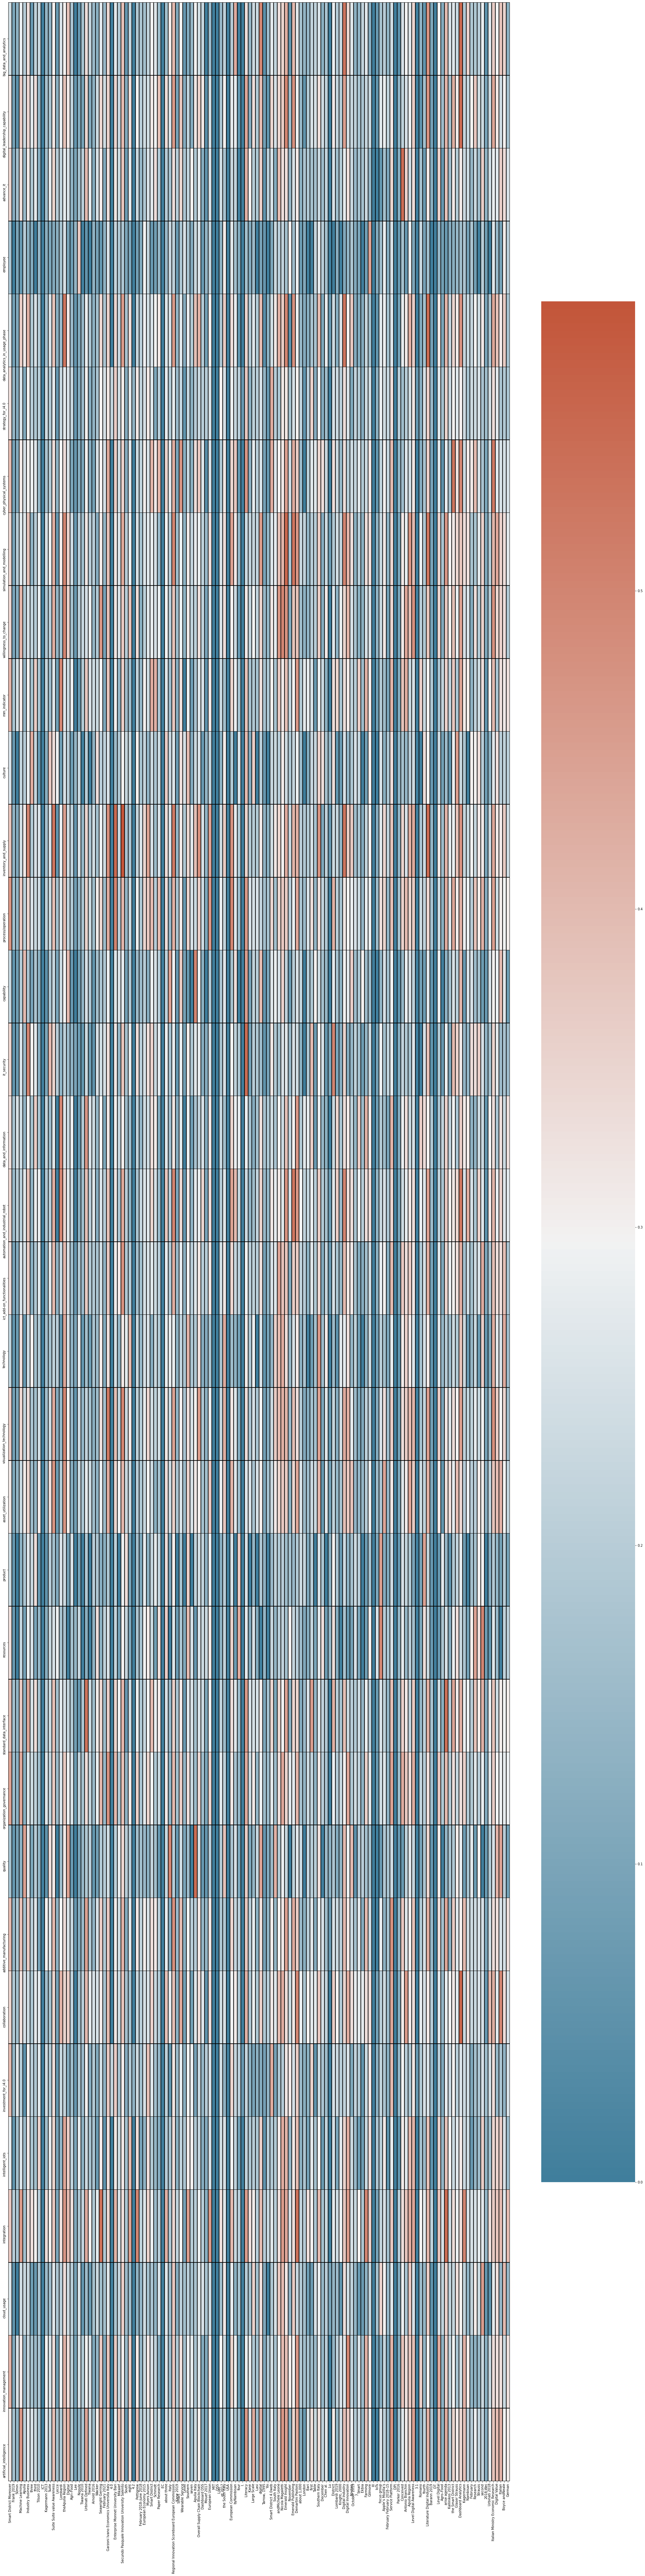

In [227]:
sim_plot(sim_df_jac,0.01)

In [220]:
from difflib import SequenceMatcher

def sequence_similarity_matrix(path1,keyword_df,param):
    
    df1_ = get_classes_df(path1)
    df2_ = keyword_df
    
    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #label_list  = df1_['label'].values
    #label_list2 = df2_['label'].values

    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values


    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))
    #Iterate and fill 
    for i in range(entity_list.shape[0]):
      u = entity_list[i]
      for j in range(entity_list2.shape[0]):
          v = entity_list2[j]
          #similarity -> structural similarity 
          M_sim[i,j] = SequenceMatcher(None, u, v).ratio()


    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

In [221]:
sim_df_seq = sequence_similarity_matrix('/Users/harshithakonduru/Downloads/I4.0_MM.owl',keyword_df,(0.5,0.5))

In [240]:
sim_df_seq

,Smart District Moreover,Frank 2019,50min,Machine Learning,Apulia,Industry Business,three,third,Tilson 2010,ICT,...,Research,Strauss,second,2018;Wei,Urbinati 2018,Italian Ministry Economic Research,Digital Value,Italian,Boyce andNeale,German
big_data_and_analytics,0.177778,0.125000,0.148148,0.105263,0.142857,0.205128,0.074074,0.148148,0.121212,0.0,...,0.133333,0.137931,0.142857,0.066667,0.285714,0.321429,0.342857,0.275862,0.277778,0.142857
digital_leadership_capability,0.230769,0.051282,0.058824,0.222222,0.171429,0.173913,0.176471,0.176471,0.100000,0.0,...,0.216216,0.166667,0.057143,0.054054,0.190476,0.222222,0.380952,0.222222,0.186047,0.171429
advance_it,0.181818,0.200000,0.133333,0.307692,0.125000,0.222222,0.133333,0.133333,0.095238,0.0,...,0.222222,0.117647,0.125000,0.222222,0.173913,0.227273,0.173913,0.352941,0.250000,0.250000
employee,0.193548,0.000000,0.153846,0.166667,0.285714,0.080000,0.307692,0.000000,0.210526,0.0,...,0.250000,0.000000,0.285714,0.125000,0.000000,0.095238,0.095238,0.133333,0.363636,0.285714
data_analytics_in_usage_phase,0.269231,0.102564,0.117647,0.266667,0.057143,0.347826,0.176471,0.058824,0.050000,0.0,...,0.162162,0.222222,0.114286,0.054054,0.142857,0.317460,0.285714,0.222222,0.232558,0.114286
strategy_for_i4.0,0.300000,0.222222,0.090909,0.121212,0.086957,0.235294,0.272727,0.181818,0.214286,0.0,...,0.160000,0.250000,0.260870,0.160000,0.333333,0.196078,0.200000,0.250000,0.129032,0.173913
cyber_physical_systems,0.133333,0.125000,0.074074,0.210526,0.214286,0.256410,0.148148,0.074074,0.060606,0.0,...,0.133333,0.206897,0.071429,0.133333,0.228571,0.142857,0.228571,0.137931,0.277778,0.214286
simulation_and_modelling,0.255319,0.117647,0.206897,0.300000,0.200000,0.195122,0.137931,0.137931,0.171429,0.0,...,0.125000,0.064516,0.266667,0.062500,0.216216,0.172414,0.162162,0.193548,0.315789,0.200000
willingness_to_change,0.227273,0.129032,0.153846,0.216216,0.222222,0.263158,0.153846,0.076923,0.187500,0.0,...,0.275862,0.142857,0.074074,0.068966,0.176471,0.290909,0.235294,0.285714,0.228571,0.222222
mm_indicator,0.400000,0.090909,0.352941,0.214286,0.222222,0.137931,0.235294,0.235294,0.173913,0.0,...,0.100000,0.105263,0.222222,0.100000,0.320000,0.260870,0.240000,0.210526,0.230769,0.222222


In [222]:
stacked_df_seq = sim_df_seq.stack().reset_index()

In [223]:
stacked_df_seq = stacked_df_seq.rename(columns={0: 'Sequence_similarity'})
stacked_df['Sequence_Similarity'] =  stacked_df_seq['Sequence_similarity']
stacked_df

,Entity_Pair_Names,Structural_Similarity,Jaccardian_Similarity,Sequence_Similarity
0,big_data_and_analytics / Smart District Moreover,1.0,0.238095,0.177778
1,big_data_and_analytics / Frank 2019,0.0,0.100000,0.125000
2,big_data_and_analytics / 50min,0.0,0.133333,0.148148
3,big_data_and_analytics / Machine Learning,0.0,0.277778,0.105263
4,big_data_and_analytics / Apulia,0.0,0.200000,0.142857
...,...,...,...,...
4687,artificial_intelligence / Italian Ministry Eco...,0.0,0.380952,0.105263
4688,artificial_intelligence / Digital Value,0.0,0.400000,0.222222
4689,artificial_intelligence / Italian,0.0,0.416667,0.266667
4690,artificial_intelligence / Boyce andNeale,0.0,0.294118,0.216216


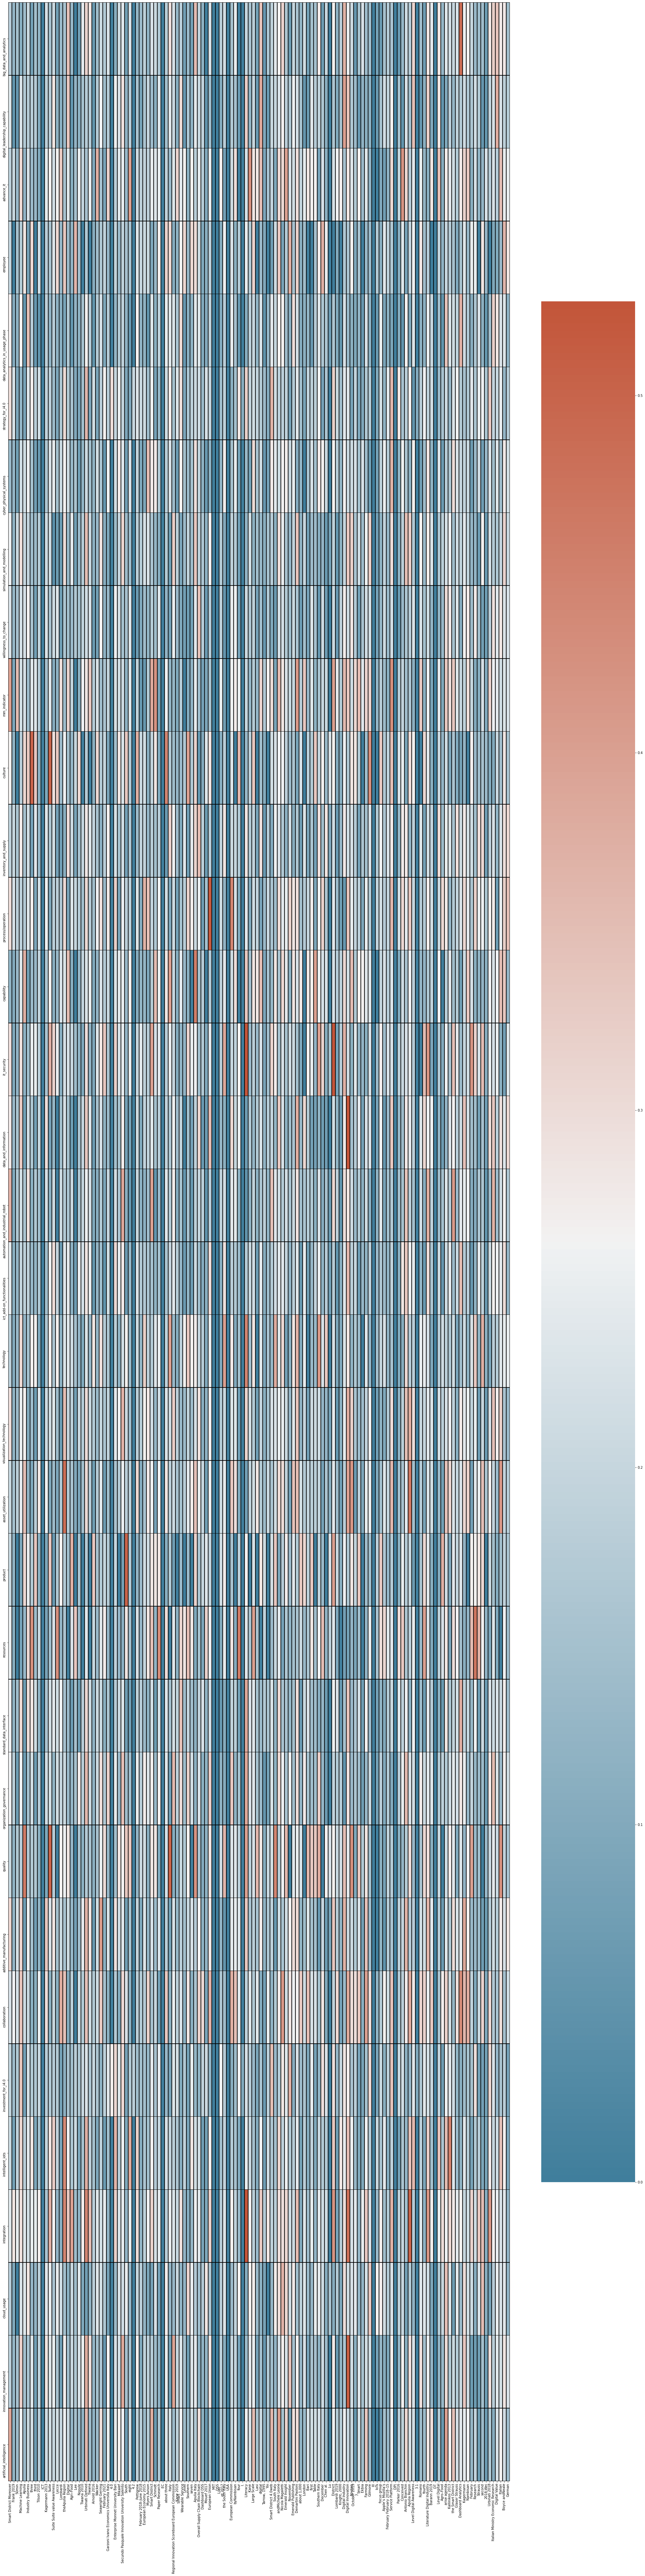

In [228]:
sim_plot(sim_df_seq,0.01)